<a href="https://colab.research.google.com/github/IshitaAgrawal-N/Machine-Learning-Regression-Models/blob/main/PENICILLIN_CONC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


# **NEURAL NETWORK MODEL**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

data = '/content/gdrive/My Drive/CHE SOP-DOP/1-s2.0-S1369703X18301359-mmc2.xlsx - Sheet1.csv'
df = pd.read_csv(data)

Parameters = ['Aeration Rate', 'AgitatorPower', 'Subst Feed Conc.', 'Substrate feed T', 'Temp', 'pH', 'Dis O2 Conc.', 'CO2 Conc.', 'VOL', 'Heat', 'Peni Conc.', 'Biomass Conc', 'Substrate Conc']
df.columns = Parameters
df.head()


,Aeration Rate,AgitatorPower,Subst Feed Conc.,Substrate feed T,Temp,pH,Dis O2 Conc.,CO2 Conc.,VOL,Heat,Peni Conc.,Biomass Conc,Substrate Conc
0,7.997728,29.666590,2.220000e-16,295.787176,297.770060,4.971986,1.159849,0.473630,100.000000,0.008368,2.220000e-16,0.100000,15.000000
1,7.786650,30.725216,2.220000e-16,296.007353,298.067225,5.001013,1.154538,0.445180,99.987549,0.021791,1.680000e-06,0.105235,14.989514
2,7.667642,30.741825,2.220000e-16,295.611213,298.156089,4.955081,1.156036,0.487884,99.975100,0.071371,3.420000e-06,0.110740,14.978389
3,7.641116,30.311470,2.220000e-16,296.484351,298.375701,4.998819,1.153754,0.587555,99.962653,0.093127,5.220000e-06,0.116530,14.966589
4,8.304563,29.958562,2.220000e-16,296.439397,297.622245,5.023802,1.159222,0.392376,99.950208,0.142380,7.080000e-06,0.122621,14.954077


In [ ]:
print(df.describe())

       Aeration Rate  AgitatorPower  ...  Biomass Conc  Substrate Conc
count   48000.000000   48000.000000  ...  48000.000000    48000.000000
mean        7.174676      33.084610  ...     10.997847        2.043106
std         1.087719       4.223971  ...      3.718742        6.038446
min         4.653990      23.979445  ...      0.000634       -0.010375
25%         6.262741      30.008750  ...     10.912407        0.012933
50%         7.289793      33.304819  ...     12.793935        0.022299
75%         8.044820      36.443006  ...     13.080617        0.057500
max         9.446993      40.697969  ...     13.489368       29.336738

[8 rows x 13 columns]


In [ ]:
X = df.drop(['Peni Conc.', 'Biomass Conc', 'Substrate Conc'], axis=1)
y = df['Peni Conc.']

In [ ]:
print(X)


       Aeration Rate  AgitatorPower  ...         VOL       Heat
0           7.997728      29.666590  ...  100.000000   0.008368
1           7.786650      30.725216  ...   99.987549   0.021791
2           7.667642      30.741825  ...   99.975100   0.071371
3           7.641116      30.311470  ...   99.962653   0.093127
4           8.304563      29.958562  ...   99.950208   0.142380
...              ...            ...  ...         ...        ...
47995       5.421724      36.327411  ...  105.720389  76.572162
47996       5.217079      35.776739  ...  105.729643  76.576014
47997       5.694386      35.206284  ...  105.738909  76.564558
47998       5.562624      36.284345  ...  105.748192  76.555443
47999       5.574685      35.997997  ...  105.757491  76.535246

[48000 rows x 10 columns]


In [ ]:
print(y)

0        2.220000e-16
1        1.680000e-06
2        3.420000e-06
3        5.220000e-06
4        7.080000e-06
             ...     
47995    1.462076e+00
47996    1.461969e+00
47997    1.461833e+00
47998    1.461667e+00
47999    1.461469e+00
Name: Peni Conc., Length: 48000, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=20)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_test_scaled)

[[-0.77346914  1.37783364  0.38123198 ...  0.46400136  1.58997535
   0.58232551]
 [-0.49204976  0.16752631  0.43282061 ... -0.30668483 -1.14626671
  -0.23690715]
 [-0.46701665 -1.82319065 -2.6629187  ... -2.90900815 -1.22421445
  -2.80568642]
 ...
 [-1.6163894  -1.02952337  0.38396933 ...  0.51943729  0.26547936
   0.65374575]
 [ 0.05831028  1.05774776  0.38102141 ... -0.08271203 -1.32254172
  -0.56494077]
 [ 0.79658618 -0.12047534  0.28458225 ...  0.59098659  1.67797132
   0.5435943 ]]


In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2,epochs=100)


Epoch 1/100
960/960 [==============================] - 2s 2ms/step - loss: 0.0559 - mae: 0.1365 - val_loss: 0.0036 - val_mae: 0.0452
Epoch 2/100
960/960 [==============================] - 2s 2ms/step - loss: 0.0033 - mae: 0.0434 - val_loss: 0.0025 - val_mae: 0.0370
Epoch 3/100
960/960 [==============================] - 2s 2ms/step - loss: 0.0023 - mae: 0.0356 - val_loss: 0.0022 - val_mae: 0.0349
Epoch 4/100
960/960 [==============================] - 2s 2ms/step - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0020 - val_mae: 0.0326
Epoch 5/100
960/960 [==============================] - 2s 2ms/step - loss: 0.0017 - mae: 0.0306 - val_loss: 0.0016 - val_mae: 0.0292
Epoch 6/100
960/960 [==============================] - 2s 2ms/step - loss: 0.0015 - mae: 0.0292 - val_loss: 0.0017 - val_mae: 0.0304
Epoch 7/100
960/960 [==============================] - 2s 2ms/step - loss: 0.0014 - mae: 0.0278 - val_loss: 0.0014 - val_mae: 0.0281
Epoch 8/100
960/960 [==============================] - 2s 2ms/step - 

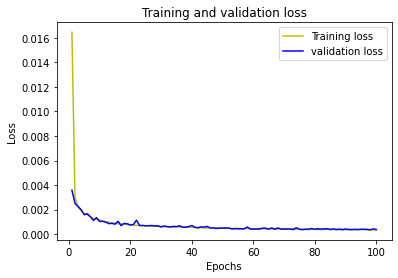

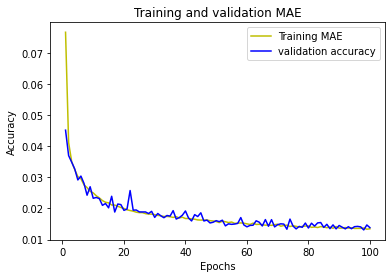

In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')

plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(X_test_scaled[:10])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:10])


Predicted values are:  [[ 1.4242018e+00]
 [ 4.5189342e-01]
 [-2.5650859e-03]
 [ 1.0395348e-03]
 [ 1.4270517e+00]
 [ 1.1766906e+00]
 [ 1.3571121e+00]
 [ 1.3786622e+00]
 [ 6.0581845e-01]
 [ 1.3827237e+00]]
Real values are:  31164    1.476894
15339    0.450512
32055    0.000088
30430    0.000040
17544    1.415289
6875     1.154326
36585    1.404618
38943    1.380360
40246    0.609156
8625     1.364260
Name: Peni Conc., dtype: float64


In [ ]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural network: ', mse_neural)
print('Mean absolute error from neural network: ', mae_neural)


300/300 [==============================] - 0s 1ms/step - loss: 4.0031e-04 - mae: 0.0144
Mean squared error from neural network:  0.0004003067151643336
Mean absolute error from neural network:  0.014359505847096443


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# **LINEAR REGRESSION MODEL**

In [ ]:
import pandas as pd
import numpy as np
data = '/content/gdrive/My Drive/CHE SOP-DOP/1-s2.0-S1369703X18301359-mmc2.xlsx - Sheet1.csv'
df = pd.read_csv(data)

Parameters = ['Aeration Rate', 'AgitatorPower', 'Subst Feed Conc.', 'Substrate feed T', 'Temp', 'pH', 'Dis O2 Conc.', 'CO2 Conc.', 'VOL', 'Heat', 'Peni Conc.', 'Biomass Conc', 'Substrate Conc']
df.columns = Parameters
print(df.head())



   Aeration Rate  AgitatorPower  ...  Biomass Conc  Substrate Conc
0       7.997728      29.666590  ...      0.100000       15.000000
1       7.786650      30.725216  ...      0.105235       14.989514
2       7.667642      30.741825  ...      0.110740       14.978389
3       7.641116      30.311470  ...      0.116530       14.966589
4       8.304563      29.958562  ...      0.122621       14.954077

[5 rows x 13 columns]


In [ ]:
X = df.drop(['Peni Conc.', 'Biomass Conc', 'Substrate Conc'], axis=1)
y = df['Peni Conc.']

In [ ]:
print(X)

       Aeration Rate  AgitatorPower  ...         VOL       Heat
0           7.997728      29.666590  ...  100.000000   0.008368
1           7.786650      30.725216  ...   99.987549   0.021791
2           7.667642      30.741825  ...   99.975100   0.071371
3           7.641116      30.311470  ...   99.962653   0.093127
4           8.304563      29.958562  ...   99.950208   0.142380
...              ...            ...  ...         ...        ...
47995       5.421724      36.327411  ...  105.720389  76.572162
47996       5.217079      35.776739  ...  105.729643  76.576014
47997       5.694386      35.206284  ...  105.738909  76.564558
47998       5.562624      36.284345  ...  105.748192  76.555443
47999       5.574685      35.997997  ...  105.757491  76.535246

[48000 rows x 10 columns]


In [ ]:
print(y)

0        2.220000e-16
1        1.680000e-06
2        3.420000e-06
3        5.220000e-06
4        7.080000e-06
             ...     
47995    1.462076e+00
47996    1.461969e+00
47997    1.461833e+00
47998    1.461667e+00
47999    1.461469e+00
Name: Peni Conc., Length: 48000, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=ml.predict(X_test)
print(y_pred)


[ 1.02768371  1.13129648  1.44726149 ... -0.04605029  0.38722273
  1.31946102]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9562594072595949

Text(0.5, 1.0, 'Penicillin Concentration: Actual vs Predicted')

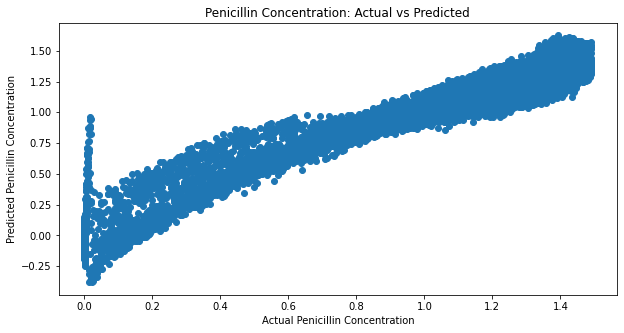

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Penicillin Concentration')
plt.ylabel('Predicted Penicillin Concentration')
plt.title('Penicillin Concentration: Actual vs Predicted')


In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:10]


,Actual Value,Predicted Value,Difference
37957,1.042639,1.027684,0.014955
45965,1.277454,1.131296,0.146158
33541,1.445266,1.447261,-0.001996
9905,0.796529,0.892862,-0.096332
9472,1.327754,1.300233,0.027521
23682,1.251489,1.293729,-0.042240
12880,0.000727,-0.123886,0.124613
786,1.427379,1.472076,-0.044696
3015,1.448542,1.341532,0.107010
37111,1.036192,1.082957,-0.046765


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)


Mean squared error from linear regression:  0.011218559706701253
Mean absolute error from linear regression:  0.07825779998067513


In [ ]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
X_train = add_constant(X_train)
OLS(y_train, X_train).fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Peni Conc.   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 8.513e+04
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        17:41:18   Log-Likelihood:                 31924.
No. Observations:               38400   AIC:                        -6.383e+04
Df Residuals:                   38389   BIC:                        -6.373e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -11.9205      0.791    -15.061      0.000     -13.472     -10.369
Aeration Rate       -0.0281      0.001    -54.038      0.000      -0.029      -0.027
AgitatorPower       -0.0028      0.000    -20.555      0.000      -0.003      -0.002
Subst Feed Conc.   -13.7104      0.102   -134.315      0.000     -13.911     -13.510
Substrate feed T     0.0018      0.002      0.959      0.338      -0.002       0.005
Temp                 0.0023      0.002      1.205      0.228      -0.001       0.006
pH                  -1.1563      0.013    -86.772      0.000      -1.182      -1.130
Dis O2 Conc.         7.3933      0.043    173.167      0.000       7.310       7.477
CO2 Conc.            0.0004      0.004      0.108      0.914      -0.006       0.007
VOL                  0.0826      0.000    225.341      0.000       0.082       0.083
Heat                 0.0262      0.000    220.739      0.000       0.026       0.026
==============================================================================
Omnibus:                     8131.954   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45928.415
Skew:                          -0.904   Prob(JB):                         0.00
Kurtosis:                       8.043   Cond. No.                     6.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **RANDOM FOREST REGRESSION MODEL**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
data = '/content/gdrive/My Drive/CHE SOP-DOP/1-s2.0-S1369703X18301359-mmc2.xlsx - Sheet1.csv'
df = pd.read_csv(data)

Parameters = ['Aeration Rate', 'AgitatorPower', 'Subst Feed Conc.', 'Substrate feed T', 'Temp', 'pH', 'Dis O2 Conc.', 'CO2 Conc.', 'VOL', 'Heat', 'Peni Conc.', 'Biomass Conc', 'Substrate Conc']
df.columns = Parameters
print(df.head())


   Aeration Rate  AgitatorPower  ...  Biomass Conc  Substrate Conc
0       7.997728      29.666590  ...      0.100000       15.000000
1       7.786650      30.725216  ...      0.105235       14.989514
2       7.667642      30.741825  ...      0.110740       14.978389
3       7.641116      30.311470  ...      0.116530       14.966589
4       8.304563      29.958562  ...      0.122621       14.954077

[5 rows x 13 columns]


In [ ]:
X = df.drop(['Peni Conc.', 'Biomass Conc', 'Substrate Conc'], axis=1)
y = df['Peni Conc.']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)


In [ ]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor   
  
#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#Predicted Height from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((X_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is:', r_square)


R-Square Error associated with Random Forest Regression is: 0.9994741818444126


Text(0.5, 1.0, 'Penicillin Concentration: Actual vs Predicted using Random Forest Regression')

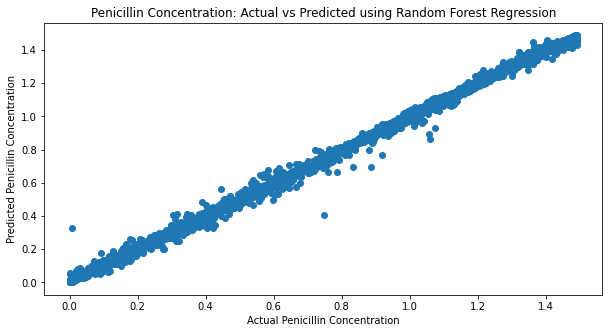

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_predict_rfr)
plt.xlabel('Actual Penicillin Concentration')
plt.ylabel('Predicted Penicillin Concentration')
plt.title('Penicillin Concentration: Actual vs Predicted using Random Forest Regression')


In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_predict_rfr, 'Difference':y_test-y_predict_rfr})
pred_y_df[0:40]


,Actual Value,Predicted Value,Difference
37957,1.042639,1.050108,-0.007469
45965,1.277454,1.279948,-0.002493
33541,1.445266,1.441806,0.003459
9905,0.796529,0.796423,0.000106
9472,1.327754,1.332256,-0.004502
23682,1.251489,1.263480,-0.011990
12880,0.000727,0.000994,-0.000267
786,1.427379,1.426759,0.000621
3015,1.448542,1.438879,0.009663
37111,1.036192,1.044600,-0.008409


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Mean squared error for Random Forest Regression for Penicillin Concentration: ', mse_rf)
print('Mean absolute error for Random Forest Regression for Penicillin Concentration: ', mae_rf)


Mean squared error for Random Forest Regression for Penicillin Concentration:  0.000134861509729775
Mean absolute error for Random Forest Regression for Penicillin Concentration:  0.005710890760285493


In [ ]:
import pandas as pd
Parameters_list = list(X.columns)
Parameters_imp = pd.Series(model.feature_importances_,index=Parameters_list).sort_values()
print(Parameters_imp)

Temp                0.000040
Substrate feed T    0.000046
CO2 Conc.           0.000482
Dis O2 Conc.        0.000537
Aeration Rate       0.000558
AgitatorPower       0.001268
pH                  0.004271
Subst Feed Conc.    0.009181
VOL                 0.044947
Heat                0.938669
dtype: float64
